# SGD( Schotastic Gradient Descent) Model

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Importing and Cleaning Data

In [2]:
data = pd.read_csv("data.csv")
# data.dtypes
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
data["horsepower"].fillna(data['horsepower'].median(), inplace=True)

In [3]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## Splitting the dataset into the Training set and Test Set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Encoding Columns

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ct = ColumnTransformer(
    [
        ('scaler', StandardScaler(), [1, 2, 3, 4, 5, 6]), 
        ('encoder', OneHotEncoder(handle_unknown='ignore'), [0, 7]) 
    ],
    remainder='passthrough'
)

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

## Training the Model

In [6]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()
regressor.fit(x_train, y_train)

SGDRegressor()

## Predicting the test set results

In [7]:
y_pred = regressor.predict(x_test)

## Evaluating the Model Performance

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared: {}%'.format(round((r2_score(y_test, y_pred)*100),2)))

Mean Squared Error: 2.0155241430013335
Mean Absolute Error: 1.159761308375148
R-squared: 82.43%


## Residual Plot

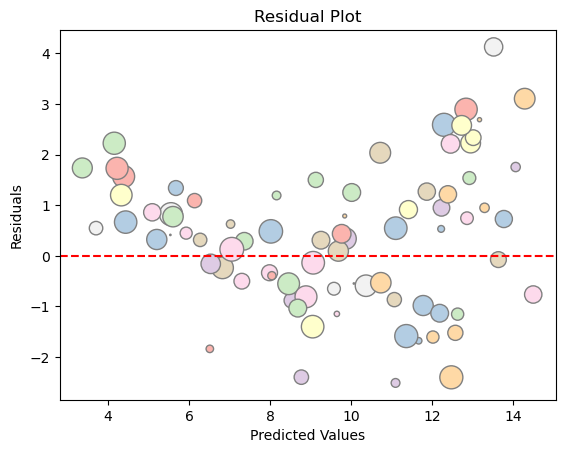

In [14]:
residuals = y_test - y_pred
sizes = np.random.randint(300, size=len(y_pred))
colors = np.random.randint(1000, size=len(y_pred))
plt.scatter(y_pred, residuals, c=colors, cmap='Pastel1',edgecolors='gray', s=sizes)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()